In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential as S
from keras.layers import Conv2D,Dense, MaxPooling2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard as T
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

Using TensorFlow backend.


In [2]:
fashion_test=pd.read_csv('data/test.csv')
fashion_train = pd.read_csv('data/train.csv')

In [3]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [5]:
fashion_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train.shape

(60000, 785)

In [8]:
training=np.array(fashion_train,dtype='float32')

In [9]:
testing=np.array(fashion_test,dtype='float32')


7.0

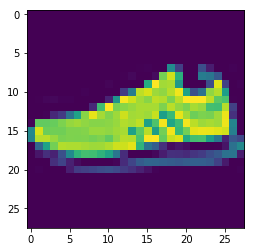

In [10]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label 

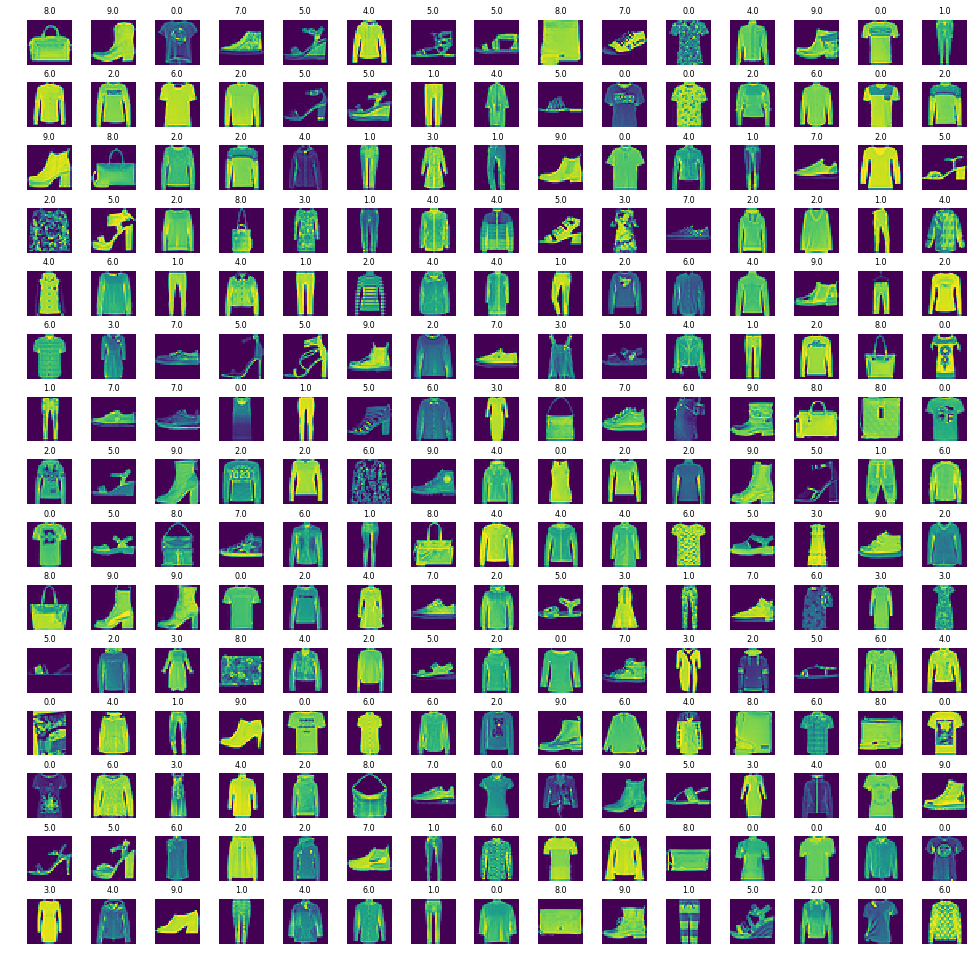

In [11]:
w_grid = 15
l_grid = 15
fig , axes = plt.subplots(l_grid,w_grid,figsize = (17,17))
axes = axes.ravel()
n_training=len(training)
for i in np.arange(0,w_grid*l_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=.4)

In [12]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:

X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=.2,random_state=12345)


In [14]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
cnn_model =S()

In [17]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [18]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
cnn_model.add(Flatten())

In [ ]:
cnn_model.add(Dense(output_dim = 32,activation='relu'))
cnn_model.add(Dense(output_dim = 10,activation='sigmoid'))

/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['accuracy'])
epochs=50

In [ ]:
cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(X_validate,y_validate))

Instructions for updating:
Use tf.cast instead.


/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 543us/step - loss: 0.9008 - acc: 0.6877 - val_loss: 0.5379 - val_acc: 0.8055
Epoch 2/50
48000/48000 [==============================] - 24s 502us/step - loss: 0.4917 - acc: 0.8271 - val_loss: 0.4422 - val_acc: 0.8456
Epoch 3/50
48000/48000 [==============================] - 22s 455us/step - loss: 0.4293 - acc: 0.8495 - val_loss: 0.4243 - val_acc: 0.8484
Epoch 4/50
48000/48000 [==============================] - 23s 483us/step - loss: 0.3964 - acc: 0.8607 - val_loss: 0.3920 - val_acc: 0.8668
Epoch 5/50
48000/48000 [==============================] - 23s 475us/step - loss: 0.3721 - acc: 0.8697 - val_loss: 0.3751 - val_acc: 0.8689
Epoch 6/50
48000/48000 [==============================] - 24s 500us/step - loss: 0.3583 - acc: 0.8746 - val_loss: 0.3513 - val_acc: 0.8775
Epoch 7/50
48000/48000 [==============================] - 23s 478us/step - loss: 0.3376 - acc: 0.8835 - val_loss: 0.

In [ ]:
evaluation= cnn_model.evaluate(X_test,y_test)
evaluation[1]

In [ ]:
predicted=cnn_model.predict_classes(X_test)

In [ ]:
predicted

In [ ]:
w_grid = 15
l_grid = 15
fig , axes = plt.subplots(l_grid,w_grid,figsize = (22,22))
axes = axes.ravel()
n_training=len(training)
for i in np.arange(0,w_grid*l_grid):
#     index = np.random.randint(0,n_training)
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("prclass ={:0.1f}\n T Class={:0.1f}".format(predicted[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=.5)

In [ ]:
cm = confusion_matrix(y_test,predicted)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [ ]:

num_classes=10
target_names=["class {}".format(i)for i in range(num_classes)]
print(classification_report(y_test,predicted,target_names=target_names))
